## Which dog should my friend buy?

My friend has recently moved into a big home all by herself and is in need of some help. She moved out of the city and into a new home out near the mountains. She is able to work from home, but she has felt lonely having the place all to herself and is considering a companion of the pet variety. She has already determined that she wants either a cat or a dog; however, there is one problem. 
As a side hustle, she is renting out the additional space within the house as Airbnb space. She wants the pet selected to be gentle, not potentially hurt her frequent visitors. As these visitors will be frequent, new, and have different styles, she wants the dog to be safe. She also does not want to get into a lawsuit situation, and is most concerned about her new friend biting guests.

Lets us explore this question of which pet is the best fit for my friend. We need to specify which breed is best for her, and since we are data scientists, we would like some concrete data to stand on before making a recommendation. Luckily for us, there is a dataset of recorded bites within the US over a given year. Let us take a look at this dataset and see if we can answer this question.

# Import Data

In [240]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [241]:
df = pd.read_csv('Health_AnimalBites.csv')

In [242]:
df.head().T

,0,1,2,3,4
bite_date,1985-05-05 00:00:00,1986-02-12 00:00:00,1987-05-07 00:00:00,1988-10-02 00:00:00,1989-08-29 00:00:00
SpeciesIDDesc,DOG,DOG,DOG,DOG,DOG
BreedIDDesc,NaN,NaN,NaN,NaN,NaN
GenderIDDesc,FEMALE,UNKNOWN,UNKNOWN,MALE,FEMALE
color,LIG. BROWN,BRO & BLA,NaN,BLA & BRO,BLK-WHT
vaccination_yrs,1.0,NaN,NaN,NaN,NaN
vaccination_date,1985-06-20 00:00:00,NaN,NaN,NaN,NaN
victim_zip,40229,40218,40219,NaN,NaN
AdvIssuedYNDesc,NO,NO,NO,NO,NO
WhereBittenIDDesc,BODY,BODY,BODY,BODY,BODY


To narrow down the data to dogs and cats, let us double check our dataset and make sure that the values in this SpeciesIDDesc is labeled coherently.

In [243]:
df['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

Let us clean the data a little before we proceed. 
1. Change the column name.
2. Fill in NaN values.
3. Change the String formating.

I'll do that in Code below.

In [244]:
df.rename(columns={'SpeciesIDDesc': 'Species'},inplace=True)

In [245]:
df['Species'] = df['Species'].fillna('OTHER')
df['Species'] = df['Species'].str.casefold().str.capitalize()
print('The unique items in the list are:',*df['Species'].unique(),sep='\n')

The unique items in the list are: Dog Cat Bat Raccoon Other Rabbit Horse Skunk Ferret


Looks like these are labeled correctly, so let us isolate the data for dogs and cats. It might be interesting to know how many bites come from cats and dogs vs other animals. Just based on exposure to humans, we expect these numbers to be higher.

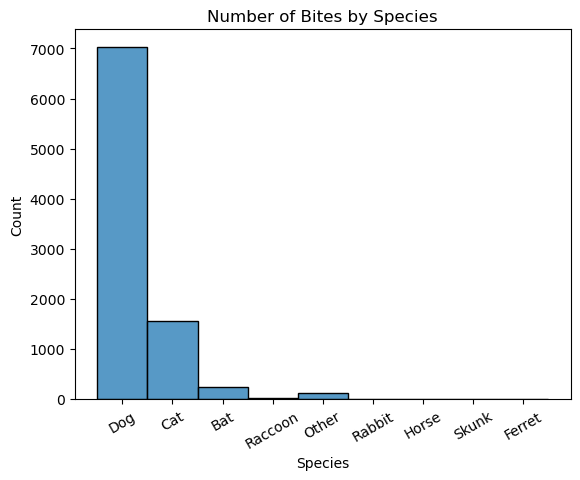

In [246]:
g = sns.histplot(data=df,x='Species')
plt.xticks(rotation=30)
g.set_xlabel('Species')
g.set_title('Number of Bites by Species');

Unsurprisingly, dogs and cats- common domesticated animals- bite vastly more than other animals. This makes sense, the opportunity to bite is higher given the  daily involvement in human life even if the frequency may be small. What is surprising is how much higher dog bites are than other animals.

In order to make more sense of this data, we need a dataset of how many of each animal is owned. From the [American Veterinary Medical Association website](https://www.avma.org/resources-tools/reports-statistics/us-pet-ownership-statistics), we can grab the information that we need. Dogs constitute 76,811,305 domesticated within the US while cats constitute 58,385,725. With that in mind let us calculate bite per animal.

In [247]:
df_counts = df.value_counts(['Species'])
bites_per_dog = df_counts['Dog']/ 76_811_305
bites_per_cat = df_counts['Cat']/ 58_385_725
ratio = bites_per_dog / bites_per_cat

print(f'The number of bites per dog within the US is {bites_per_dog:.6f} over the given year.')
print(f'The number of bites per cat within the US is {bites_per_cat:.6f} over the given year.')
print(f'The ratio of bites per dog vs cat within the US is {ratio:.2f} over the given year.')

The number of bites per dog within the US is 0.000092 over the given year.
The number of bites per cat within the US is 0.000027 over the given year.
The ratio of bites per dog vs cat within the US is 3.41 over the given year.


The obvious choice here would be to go with a cat. 

I proceed to tell my friend that dogs are 3.41 times more likely to bite based on the data we have. However, she is concerned about cat allergies and, therefore, potential customers possibly avoiding her Airbnb because of owning a cat. In addition, her new place is out in the woods and she believes a dog would be more suited for the area. She would like to get a dog to explore the area with.

## Dogs

She wants us figure out which dog to purchase at this point, with as much detail as possible. Given the dataset information, let us try to determine which dog breed and gender we would recommend to purchase.

In [248]:
dogs = df[df['Species'].isin(['Dog'])].copy()
dogs.head().T

,0,1,2,3,4
bite_date,1985-05-05 00:00:00,1986-02-12 00:00:00,1987-05-07 00:00:00,1988-10-02 00:00:00,1989-08-29 00:00:00
Species,Dog,Dog,Dog,Dog,Dog
BreedIDDesc,NaN,NaN,NaN,NaN,NaN
GenderIDDesc,FEMALE,UNKNOWN,UNKNOWN,MALE,FEMALE
color,LIG. BROWN,BRO & BLA,NaN,BLA & BRO,BLK-WHT
vaccination_yrs,1.0,NaN,NaN,NaN,NaN
vaccination_date,1985-06-20 00:00:00,NaN,NaN,NaN,NaN
victim_zip,40229,40218,40219,NaN,NaN
AdvIssuedYNDesc,NO,NO,NO,NO,NO
WhereBittenIDDesc,BODY,BODY,BODY,BODY,BODY


In [249]:
dogs.value_counts(['GenderIDDesc'])

GenderIDDesc
MALE            3307
FEMALE          1601
UNKNOWN          464
dtype: int64

In addition, lets make changes to the gender column, as this will be critical for our final recommendation.

In [250]:
dogs['GenderIDDesc'] = dogs['GenderIDDesc'].fillna('UNKNOWN')
dogs.rename(columns={'GenderIDDesc': 'Gender'},inplace=True)
dogs['Gender'] = dogs['Gender'].str.casefold().str.capitalize()
print('The unique items in the list are:',*dogs['Gender'].unique())

In [252]:
dogs.value_counts(['BreedIDDesc'])

BreedIDDesc    
PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
BEARDED COLLIE        1
AMER FOX HOUND        1
IRISH WOLFHOUND       1
FOX TERRIER MIX       1
OLD ENG SHP DOG       1
Length: 101, dtype: int64

Wow, there are over 100 breeds of species under dogs on this list. Let us try to focus on ones that are most common. Before we do that, lets adjust the column we work with.

In [253]:
dogs['BreedIDDesc'] = dogs['BreedIDDesc'].fillna('UNKNOWN')
dogs.rename(columns={'BreedIDDesc': 'Breed'},inplace=True)
dogs['Breed'] = dogs['Breed'].str.casefold().str.capitalize()
print('The different dog breeds are: ')
print(dogs.value_counts(['Breed']))

I was able to obtain % of specific breeds owned from the following [website](http://images.akc.org/pdf/archives/AKCregstats_1991-2008.pdf). I made the dictionary below of the most common dogs, selected from the latest poll available, which was 2009 data. Some points were edited or removed to match the available data. We will only be looking at these breeds.

In [255]:
breed_count_2009 = {'Labrador retriv': 89_599,
    'Germ shepherd': 40_938,
    'Yorkshire terrier':37_778, 
    'Gold retriever': 30_735,
    'Beagle': 30_672,
    'Boxer': 25_472,
    'Am bulldog': 23_248,
    'Dachshund': 21_089,
    'Poodle': 18_601,
    'Shih tzu': 17_314,
    'Schnauzer': 14_263,
    'Chichauhua': 14_018,
    'Rottweiler': 12_869,
    'Pomeranian': 11_415,
    'Doberman': 10_233,
    'Pug': 9_394,
    'Sheep dog': 9_045,
    'Boston terrier': 8_991,
    'Maltase': 8_866,
    'Great dane': 8_443,
    'Siberan husky': 8_339,
    'Cocker spainel': 8_282,
    'French bulldog': 7_381}

total_2009_dogs = 649_677
perc_2009 = {k: v/total_2009_dogs * 100 for k,v in breed_count_2009.items()}
pop_dogs = dogs[dogs['Breed'].isin(list(perc_2009.keys()))].copy()
print(pop_dogs['Breed'].value_counts())

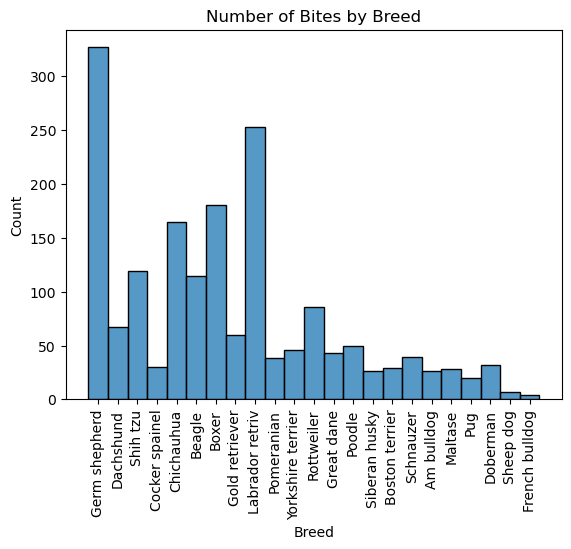

In [257]:
g = sns.histplot(data=pop_dogs, x='Breed')
plt.xticks(rotation=90)
g.set_xlabel('Breed')
g.set_title('Number of Bites by Breed');

In [258]:
counts = pop_dogs.value_counts(['Breed'])
ratio_bites = {k:counts[k]/(v/100) for k,v in perc_2009.items()}

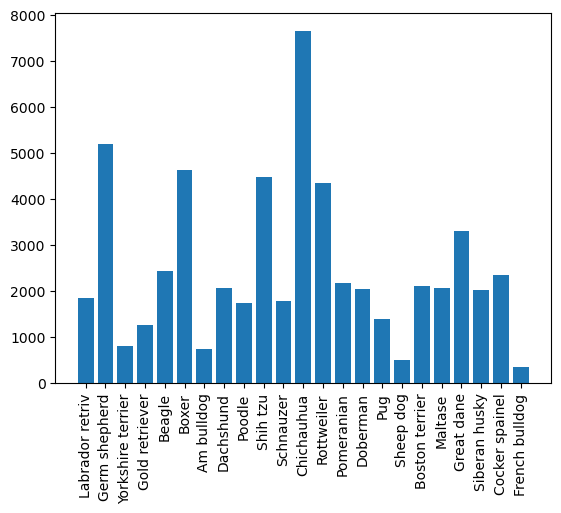

In [259]:
plt.bar(range(len(ratio_bites)), list(ratio_bites.values()), tick_label=list(ratio_bites.keys()))
plt.xticks(rotation=90)
plt.xlabel('Breed')
plt.ylabel('Ratio of Bites over US home ownership')
plt.show()

Interesting, it seems like French Bulldog and American Bulldog would be a good fit; however, 'pit bulls' would classify as either and they have the most bites present by a sizeable margin and were not split up in this analysis. Since we can not conclude which breed of dog these bites belong too, we will omit bulldogs for now.

It seems like Sheep dog, Yorkshire terrier, or Golden retriever would be great pick. Let us isolate these dogs and progress.

In [265]:
top_dogs = pop_dogs[pop_dogs['Breed'].isin(['Sheep dog', 'Yorkshire terrier', 'Gold retriever'])].copy()

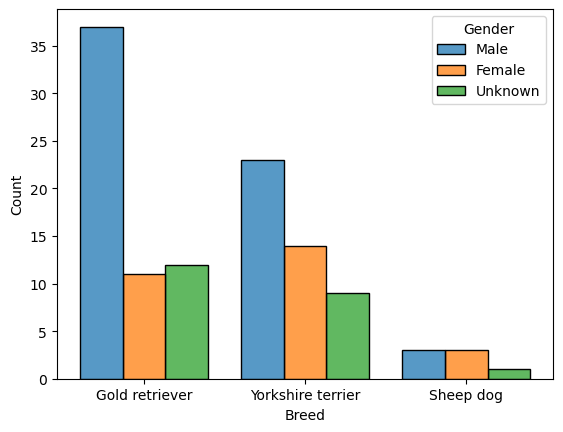

In [268]:
sns.histplot(data=top_dogs, x='Breed', hue='Gender', 
             multiple= 'dodge', 
             hue_order=['Male','Female','Unknown'],
             shrink=0.8);

Seems like a female Golden Retriever would be just as good of an option, if not better than a Yorkshire Terrier. A sheep dog would be the best option, regardless of gender. Of course other reasons to choose one dog or the other would be more personal preference. Seem like a bigger dog is less likely to bite human owners and their guests.